# Reproduce: Dielectric function, screening, and plasmons in two-dimensional graphene

E. H. Hwang and S. Das Sarma, <i>Dielectric function, screening, and plasmons in two-dimensional graphene</i>, Phys. Rev. B <strong>75</strong>, 205418 (2007).

Reproduced by <strong>Eunjong Kim</strong> (ekim7206@gmail.com)

In [1]:
from numpy import *
from scipy.integrate import dblquad
from scipy.optimize import newton
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

# matplotlib setup
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['text.usetex'] = True

Unlike conventional 2D systems with quadratic dispersion, the graphene shows a linear energy-momentum relation 
$$\varepsilon_{\mathbf{k}s} = s\hbar v_\mathrm{F} |\mathbf{k}| $$
near the $K, K'$ points of the Brillouin zone. Here, $v_\mathrm{F}$ is the 2D Fermi velocity and $s=\pm1$ is the band index. Based on this linear relation, the dynamical screening function (dielectric function) can be obtained using the random-phase approximation (RPA):
$$\epsilon^\mathrm{RPA}(\mathbf{q},\omega) = 1 - v_\mathrm{C}(\mathbf{q})\chi_0(\mathbf{q},\omega)$$
where $v_\mathrm{C}(\mathbf{q}) = 2\pi e^2/\kappa q$ is the 2D Coulomb potential in the momentum space.

In [4]:
def energy(k, phi, q, s):
    '''
    Linear energy dispersion near the K point of the momentum space
    '''
    return (s * sqrt(k ** 2 + q ** 2 + 2 * k * q * cos(phi)))

In [5]:
q_e = 1.60217662e-19 * 2.9979245800e9   # charge of an electron in units of Coulomb
kappa = 2.5

def v_c(q):
    '''
    Coulomb potential in momentum space in Gaussian units (CGS)
    '''
    return 2 * pi * q_e ** 2 / (kappa * abs(q))

$\chi_0 (\mathbf{q},\omega)$ is the non-interacting density-density response function given by
$$\chi_0(\mathbf{q},\omega) = g_s g_v\sum_{s,s' = \pm 1} \int \frac{d^2 k}{(2\pi)^2} \frac{f_{\mathbf{k},s} - f_{\mathbf{k+q},s'}}{\hbar \omega + \varepsilon_{\mathbf{k},s} - \varepsilon_{\mathbf{k+q},s'}+i\eta} F_{s, s'}(\mathbf{k},\mathbf{k+q}),$$
where $g_s=g_v=2$ denote the spin and valley degeneracies and $\eta\rightarrow 0^+$ is an infinitesimal positive number. $F_{s,s'}(\mathbf{k},\mathbf{k}')= (1 + ss'\cos{\theta_{\mathbf{k},\mathbf{k}'}})/2$ is the overlap between wavefunctions with $\theta_{\mathbf{k},\mathbf{k}'}$ being the angle between vectors $\mathbf{k}$ and $\mathbf{k}'$. Here, $f_{\mathbf{k}, s}$ is the Fermi distribution function.

The non-interacting density-density response function $\chi_0$ can be decomposed into two parts, $\chi_0 = \chi^{+}_0 + \chi^{-}_0$, with

$$\chi^{+}_0(\mathbf{q}, \omega) = \frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left[\frac{(f_{\mathbf{k},+} - f_{\mathbf{k+q},+})(1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta}
+\frac{f_{\mathbf{k},+} (1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta} 
-\frac{f_{\mathbf{k+q},+}(1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta}\right],$$

$$\chi^{-}_0(\mathbf{q}, \omega) = \frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left[\frac{(f_{\mathbf{k},-} - f_{\mathbf{k+q},-})(1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},-} + i\eta}
+\frac{f_{\mathbf{k},-} (1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta} 
-\frac{f_{\mathbf{k+q},-}(1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta}\right].$$

$$\cos{\theta_{\mathbf{k},\mathbf{k+q}}} = \frac{\mathbf{k}\cdot\mathbf{k+q}}{k|\mathbf{k+q}|} = \frac{k + q\cos{\phi}}{\sqrt{k^2 + q^2 + 2kq\cos{\phi}}}$$

In [6]:
def cosine(k, phi, q):
    '''
    cosine between the two vectors k and k + q as a function of phi,
    which is the angle bewteen k and q.
    '''
    return ((k + q * cos(phi)) / sqrt(k**2 + q**2 + 2 * k * q * cos(phi)))

In the zero-temperature limit $T\rightarrow 0$, the Fermi distribution function $f_{\mathbf{k} s}$ reduces to a simple step function or unity depending on the band index $s=\pm 1$:
$$f_{\mathbf{k} s} = \left[e^{\beta(\varepsilon_{\mathbf{k}s}-\mu)} + 1\right]^{-1}\quad \xrightarrow{T\rightarrow 0} \quad \Theta(\varepsilon_\mathrm{F} - \varepsilon_{\mathbf{k}s}) = 
\begin{cases} \Theta(k_\mathrm{F} - k) & \textrm{for }s= +1 \\
              1 & \textrm{for }s=-1 
\end{cases}$$
Here, the Fermi energy is defined as $\varepsilon_\mathrm{F} = \hbar v_\mathrm{F}k_\mathrm{F}$, with $k_\mathrm{F}$ being the Fermi wavevector.

In [7]:
eta = 1e-4

We express the plus and the minus polarizabilities in simpler forms and perform the numerical integration:

$$\therefore \frac{\chi^{+}_0(\mathbf{q},\omega)}{D(\varepsilon_\mathrm{F})} = \int_{\tilde{k}<1} \frac{d^{2}\tilde{k}}{4\pi}\left[\left(\frac{1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},+}-\tilde{\varepsilon}_{\mathbf{k+q},+} + i\tilde{\eta}}
+\frac{1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},+}-\tilde{\varepsilon}_{\mathbf{k+q},-} + i\tilde{\eta}}
\right)
-
\left(\frac{1 + \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k-q},+}-\tilde{\varepsilon}_{\mathbf{k},+} + i\tilde{\eta}} + 
\frac{1 - \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k-q},-}-\tilde{\varepsilon}_{\mathbf{k},+} + i\tilde{\eta}} \right)
\right] $$

In [8]:
def polarizability0_p_integrand(k, phi, q, omega):
    '''
    For the evaluation of this dblquad, k-integration followed
    by phi-integration is more efficient.
    '''
    e11 = (1 + cosine(k, phi, q)) / (omega + energy(k, phi, 0, +1)
                                     - energy(k, phi, q, +1) + 1j * eta)
    e12 = (1 - cosine(k, phi, q)) / (omega + energy(k, phi, 0, +1)
                                     - energy(k, phi, q, -1) + 1j * eta)
    e1 = e11 + e12

    e21 = (1 + cosine(k, pi + phi, q)) / (omega + energy(k, pi + phi, q, +1)
                                      - energy(k, phi, 0, +1) + 1j * eta)
    e22 = (1 - cosine(k, pi + phi, q)) / (omega + energy(k, pi + phi, q, -1)
                                      - energy(k, phi, 0, +1) + 1j * eta)
    e2 = - (e21 + e22)
    return - k * (e1 + e2) / (4 * pi)

def polarizability0_p_real(q, omega):
    return dblquad(lambda k, phi: polarizability0_p_integrand(k, phi, q, omega).real,
                   0, 2 * pi, lambda k: 0, lambda k: 1,
                   epsabs=1e-05, epsrel=1e-05)[0]

def polarizability0_p_imag(q, omega):
    return dblquad(lambda k, phi: polarizability0_p_integrand(k, phi, q, omega).imag,
                   0, 2 * pi, lambda k: 0, lambda k: 1,
                   epsabs=1e-05, epsrel=1e-05)[0]

$$\chi^{-}_0(\mathbf{q}, \omega) \xrightarrow{T\rightarrow0} \frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left[
\frac{ 1}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta} 
-\frac{1}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta}\right](1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}) $$

$$\therefore \frac{\chi^{-}_0(\mathbf{q}, \omega)}{D(\varepsilon_\mathrm{F})}= \int \frac{ d^{2}\tilde{k}}{4\pi}\left[
\frac{1}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},-}-\tilde{\varepsilon}_{\mathbf{k+q},+} + i\tilde{\eta}} 
-\frac{1}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},+}-\tilde{\varepsilon}_{\mathbf{k+q},-} + i\tilde{\eta}}\right](1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}) $$

where $\tilde{\omega} = \hbar\omega/\varepsilon_\mathrm{F}$, $\tilde{\varepsilon}_{\mathbf{k},s} = \varepsilon_{\mathbf{k},s}/\varepsilon_\mathrm{F}$, and $\tilde{k} = k/k_\mathrm{F}$. Here $$D(\varepsilon_\mathrm{F}) = \frac{g_s g_v}{2\pi} \frac{k_\mathrm{F}}{\hbar v_\mathrm{F}} = \frac{g_s g_v}{2\pi}\frac{k_\mathrm{F}}{\varepsilon_\mathrm{F}}$$
is the density of states at the Fermi energy. Note that the static polarizability at $q=0$ satisfies $$\Pi_0(0, 0) = \Pi_0^{+}(0,0) + \Pi_0^{-} (0, 0) = D(\varepsilon_\mathrm{F}).$$

In [9]:
# spin and valley degeneracies
g_s, g_v = 2, 2
# density in units of cm^{-2}
n = 1e12
# Fermi wavevector in CGS units
wavevector_F = (4 * pi * n / (g_s * g_v))**(1/2)

hbar = 1.0545716e-27
# Fermi energy in CGS units
energy_F = 6.5 * 1.60217662e-12 * 1e-8
# Density of states at the Fermi level in CGS units
DOS_F = g_s * g_v * wavevector_F / (2 * pi * energy_F)

In [10]:
def polarizability0_m_integrand(k, phi, q, omega):
    '''
    For the evaluation of this dblquad, phi-integration followed by
    k-integration is much more efficient.
    '''
    e1 = + 1 / (omega + energy(k, phi, 0, -1) - energy(k, phi, q, +1) + 1j * eta)
    e2 = - 1 / (omega + energy(k, phi, 0, +1) - energy(k, phi, q, -1) + 1j * eta)
    e = (e1 + e2) * (1 - cosine(k, phi, q))
    return - k * e / (4 * pi)

k_c = 50     # cutoff wavevector for numerical integration

def polarizability0_m_real(q, omega):
    return dblquad(lambda phi, k: polarizability0_m_integrand(k, phi, q, omega).real,
                   0, k_c, lambda phi: 0, lambda phi: 2 * pi,
                   epsabs=1e-05, epsrel=1e-05)[0]

def polarizability0_m_imag(q, omega):
    return dblquad(lambda phi, k: polarizability0_m_integrand(k, phi, q, omega).imag,
                   0, k_c, lambda phi: 0, lambda phi: 2 * pi,
                  epsabs=1e-05, epsrel=1e-05)[0]

In [11]:
def polarizability0_real(q, omega):
    return (polarizability0_p_real(q, omega)
            + polarizability0_m_real(q, omega))

def polarizability0_imag(q, omega):
    return (polarizability0_p_imag(q, omega)
            + polarizability0_m_imag(q, omega))

def polarizability0(q, omega):
    return (polarizability0_real(q, omega)
            + 1j * polarizability0_imag(q, omega))

The interacting polarizability $\Pi^\mathrm{RPA}(\mathbf{q},\omega)$  within RPA is calculated as follows:
$$ \Pi^\mathrm{RPA}(\mathbf{q},\omega) = \frac{\Pi_0(\mathbf{q},\omega)}{\epsilon^\mathrm{RPA}(\mathbf{q},\omega)}=\frac{\Pi_0(\mathbf{q},\omega)}{1 - v_\mathrm{C}(\mathbf{q})\Pi_0(\mathbf{q},\omega)}$$

The loss function is given by
$$ -\mathrm{Im}\left[\frac{1}{\epsilon^\mathrm{RPA}(\mathbf{q},\omega)}\right] = -\mathrm{Im}\left[1 + v_\mathrm{C}(\mathbf{q})\Pi^\mathrm{RPA} (\mathbf{q},\omega) \right] = -\mathrm{Im}\left[\frac{1}{1-v_\mathrm{C}(\mathbf{q})\Pi_0(\mathbf{q},\omega)}\right]$$

## Plasmon mode dispersion $\omega(\mathbf{q})$ in 2D graphene

In [64]:
N = 20

# range of omega/E_F values: 0 to 3
omega = linspace(1e-2, 3, N)
# range of q/k_F values: 0 to 3
q = linspace(1e-2, 3, N)

In [13]:
omega0 = sqrt(g_s * g_v * q_e ** 2 * energy_F / (2 * kappa))

In [14]:
# empty array to store the imaginary part of polarizability values
polarizability = zeros((N, N), dtype=complex)

In [15]:
# time-consuming calculation
for idx1, q_ in enumerate(q):
    for idx2, omega_ in enumerate(omega):
        polarizability0_ = polarizability0(q_, omega_)
        polarizability[idx1, idx2] = (polarizability0_ / (1 - v_c(q_ * wavevector_F) *
                                                          DOS_F * polarizability0_))
    print(r"idx1 = %d, q = %f complete" % (idx1, q_))

idx1 = 0, q = 0.010000 complete
idx1 = 1, q = 0.167368 complete
idx1 = 2, q = 0.324737 complete
idx1 = 3, q = 0.482105 complete
idx1 = 4, q = 0.639474 complete
idx1 = 5, q = 0.796842 complete
idx1 = 6, q = 0.954211 complete
idx1 = 7, q = 1.111579 complete
idx1 = 8, q = 1.268947 complete
idx1 = 9, q = 1.426316 complete
idx1 = 10, q = 1.583684 complete
idx1 = 11, q = 1.741053 complete
idx1 = 12, q = 1.898421 complete
idx1 = 13, q = 2.055789 complete
idx1 = 14, q = 2.213158 complete
idx1 = 15, q = 2.370526 complete
idx1 = 16, q = 2.527895 complete
idx1 = 17, q = 2.685263 complete
idx1 = 18, q = 2.842632 complete
idx1 = 19, q = 3.000000 complete


In [16]:
# plasmon dispersion (numerical) --- needs revision
# plasmon_freq = zeros(N)

#for idx, q_ in enumerate(q):
#    plasmon_freq[idx] = newton(lambda omega: (1 - v_c(q_ * wavevector_F) * DOS_F *
#                                              polarizability0_real(q_,omega)),
#                               omega0 * sqrt(q_) / energy_F, tol=1e-4)
#    print(plasmon_freq[idx])

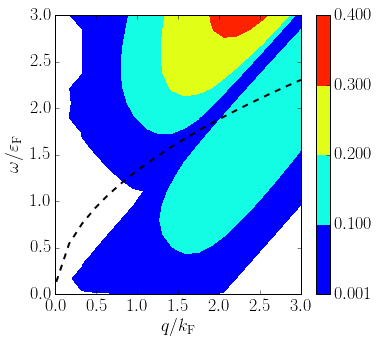

In [65]:
fig, ax = plt.subplots(1,1, figsize=(5.5,5))

#ax.plot(q, plasmon_freq)
ax.plot(q, omega0 * sqrt(q)/ energy_F, ls='--', color='black',
        lw=2, label=r'$\omega = \omega_0 \sqrt{q}$')

ax.set_xlim([0, 3]); ax.set_ylim([0, 3]);
#ax.imshow(q, omega, polarizability_imag, origin='down')
cs = ax.contourf(q, omega, polarizability.imag.T, [0.001, 0.1, 0.2, 0.3, 0.4])
ax.set_xlabel(r'$q/k_\mathrm{F}$')
ax.set_ylabel(r'$\omega/\varepsilon_\mathrm{F}$')
fig.colorbar(cs, ax=ax)

The imaginary part of the dielectric function $\epsilon^{\mathrm{RPA}}(\mathbf{q},\omega)$ calculated numerically within RPA is mapped. To find the plasmon dispersion, 

## Static Polarizabililty ($\omega=0$) for 2D graphene

In [68]:
N = 20

# range of q/k_F values: 0 to 5
q = linspace(1e-2, 5, N)

In [57]:
# empty arrays to store polarizability values
polarizability0_p, polarizability0_m = zeros(N), zeros(N)

In [58]:
# static polarizability
for idx, q_ in enumerate(q):
    polarizability0_p[idx] = polarizability0_p_real(q_, 0)
    polarizability0_m[idx] = polarizability0_m_real(q_, 0)

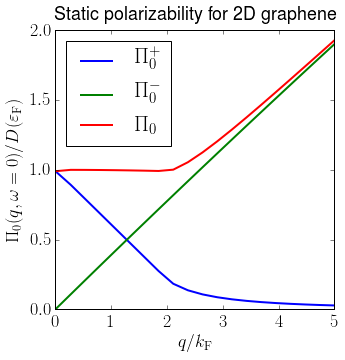

In [69]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot(q, polarizability0_p, label=r'$\Pi^{+}_0$', lw=2)
ax.plot(q, polarizability0_m, label=r'$\Pi^{-}_0$', lw=2)
ax.plot(q, polarizability0_p + polarizability0_m, label=r'$\Pi_0$', lw=2)

ax.set_xlabel(r'$q/k_\mathrm{F}$')
ax.set_ylabel(r'$\Pi_0(q,\omega=0)/D(\varepsilon_\mathrm{F})$')
fig.text(0.12, 0.93, r'Static polarizability for 2D graphene')
ax.set_xlim([0, 5]); ax.set_ylim([0, 2])
ax.legend(loc=0);

This is the static $(\omega=0)$ polarizability for 2D graphene and Figure 2 of [Phys. Rev. B <strong>75</strong>, 205418 (2007)] has been reproduced.

# Version Information

In [13]:
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.4.4 64bit [GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
IPython 4.0.1
OS Darwin 15.2.0 x86_64 i386 64bit
numpy 1.10.4
scipy 0.16.1
matplotlib 1.5.0
Tue Jan 12 01:06:13 2016 KST